***Completed by Antoine Courbi and Cesar Delaygues***

# **Tutorial 3 - Computer Vision**

# **1 - Install Libraries**

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPool2D, Flatten, Dense

## **2 - Display the shapes**

We use the “take” method on the dataset and iterate over it.

In [3]:
# Download the "cats_vs_dogs" dataset
dataset, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)

for image, label in dataset['train'].take(5):
    print(image.shape)

(262, 350, 3)
(409, 336, 3)
(493, 500, 3)
(375, 500, 3)
(240, 320, 3)


2023-12-11 12:34:16.465526: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2023-12-11 12:34:16.465548: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-11 12:34:16.465553: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-11 12:34:16.465599: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-11 12:34:16.465766: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


As we can see the shapes of the images vary, in both x and y shapes.
Lets analyze some of them.

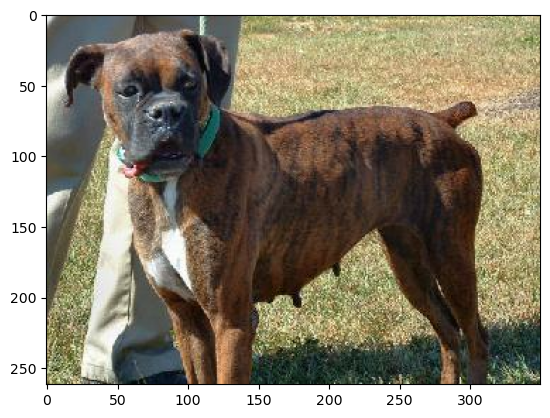

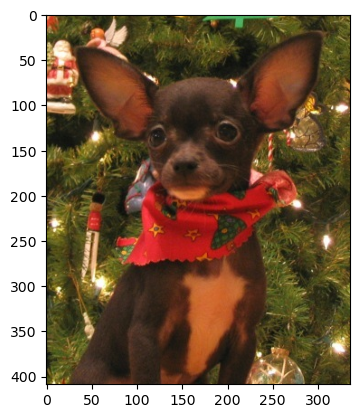

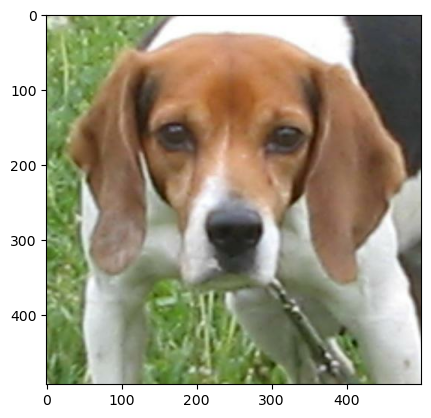

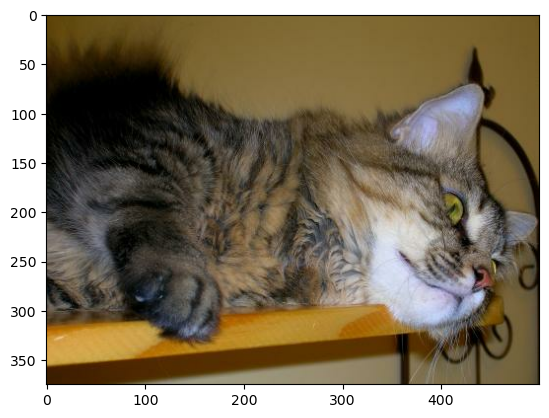

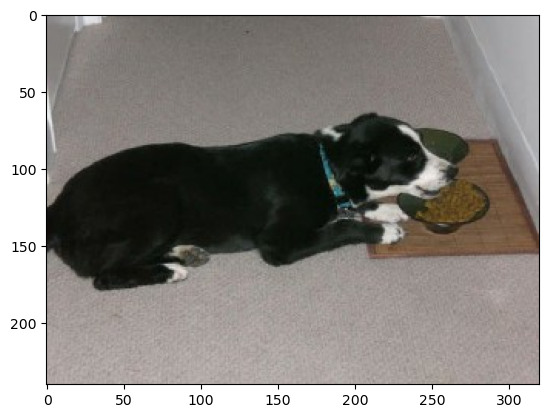

In [4]:
import matplotlib.pyplot as plt

for image, label in dataset['train'].take(5):
    plt.figure()
    plt.imshow(image.numpy())
    plt.show()

We know we will need the maximum shape later, so lets look for the maximum x and y shapes.

In [5]:
max_x = 0   
max_y = 0
for image, label in dataset['train']:
    if image.shape[0] > max_x:
        max_x = image.shape[0]
    if image.shape[1] > max_y:
        max_y = image.shape[1]
print(max_x, max_y)

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


500 500


Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


THe maximum shape is **500x500x3.**

## **3 - Define the Architecture**

Lets define the architecture of the model as described in the word first.

In [6]:
classifier = Sequential()

classifier.add(Convolution2D(32, (3, 3), input_shape=(500, 500, 3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2, 2)))

classifier.add(Convolution2D(20, (3, 3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2, 2)))

classifier.add(Convolution2D(12, (3, 3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2, 2)))

classifier.add(Convolution2D(8, (3, 3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2, 2)))

classifier.add(Flatten())

classifier.add(Dense(activation='relu', units=128))
classifier.add(Dense(activation='sigmoid', units=1))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Then lets write the `preprocessing` function.
And create the ***train*** and **test** datasets as fraction of the **shuffled complet dataset**.

In [7]:
def preprocess(image, label):
    image = tf.image.resize(image, (500, 500))
    image = tf.image.per_image_standardization(image)
    return image, label

dataset2 = dataset['train'].shuffle(1200)

train_dataset = dataset2.take(1000).map(preprocess).batch(32)
test_dataset = dataset2.skip(1000).take(200).map(preprocess).batch(32)


Now we train the model.

In [8]:
classifier.fit(train_dataset, epochs=15, validation_data=test_dataset)

Epoch 1/15


2023-12-11 12:34:21.490589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 7s 185ms/step - loss: 0.7586 - accuracy: 0.5130 - val_loss: 0.6903 - val_accuracy: 0.5900
Epoch 2/15
32/32 [==============================] - 6s 174ms/step - loss: 0.6903 - accuracy: 0.5510 - val_loss: 0.6868 - val_accuracy: 0.6300
Epoch 3/15
32/32 [==============================] - 6s 177ms/step - loss: 0.6790 - accuracy: 0.5910 - val_loss: 0.6630 - val_accuracy: 0.6700
Epoch 4/15
32/32 [==============================] - 6s 180ms/step - loss: 0.6554 - accuracy: 0.6000 - val_loss: 0.6523 - val_accuracy: 0.5750
Epoch 5/15
32/32 [==============================] - 6s 178ms/step - loss: 0.6596 - accuracy: 0.6130 - val_loss: 0.7153 - val_accuracy: 0.5650
Epoch 6/15
32/32 [==============================] - 6s 173ms/step - loss: 0.6368 - accuracy: 0.6620 - val_loss: 0.5835 - val_accuracy: 0.6500
Epoch 7/15
32/32 [==============================] - 6s 173ms/step - loss: 0.5667 - accuracy: 0.6800 - val_loss: 0.5201 - val_accuracy: 0.7300
Epoch 8/15
32/32 

Lets redefine the model but use a larger dataset for train and test, and reduce the number of epochs from 115 to 10.

In [123]:
classifier = Sequential()

classifier.add(Convolution2D(32, (3, 3), input_shape=(500, 500, 3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2, 2)))

classifier.add(Convolution2D(20, (3, 3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2, 2)))

classifier.add(Convolution2D(12, (3, 3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2, 2)))

classifier.add(Convolution2D(8, (3, 3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2, 2)))

classifier.add(Flatten())

classifier.add(Dense(activation='relu', units=128))
classifier.add(Dense(activation='sigmoid', units=1))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [124]:
dataset2 = dataset['train'].shuffle(12000)

train_dataset = dataset2.take(10000).map(preprocess).batch(32)
test_dataset = dataset2.skip(10000).take(2000).map(preprocess).batch(32)

In [125]:
classifier.fit(train_dataset, epochs=10, validation_data=test_dataset)


Epoch 1/10


Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


  6/313 [..............................] - ETA: 56s - loss: 0.7625 - accuracy: 0.5156

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


166/313 [==============>...............] - ETA: 23s - loss: 0.6566 - accuracy: 0.5975

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


268/313 [========================>.....] - ETA: 7s - loss: 0.6219 - accuracy: 0.6368

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


285/313 [==========================>...] - ETA: 4s - loss: 0.6203 - accuracy: 0.6399

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


299/313 [===========================>..] - ETA: 2s - loss: 0.6179 - accuracy: 0.6429

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


313/313 [==============================] - ETA: 0s - loss: 0.6165 - accuracy: 0.6456

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


313/313 [==============================] - 63s 190ms/step - loss: 0.6165 - accuracy: 0.6456 - val_loss: 0.5514 - val_accuracy: 0.7180
Epoch 2/10


Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


  6/313 [..............................] - ETA: 58s - loss: 0.5234 - accuracy: 0.7812 

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


166/313 [==============>...............] - ETA: 24s - loss: 0.5380 - accuracy: 0.7348

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


268/313 [========================>.....] - ETA: 7s - loss: 0.5358 - accuracy: 0.7361

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


285/313 [==========================>...] - ETA: 4s - loss: 0.5337 - accuracy: 0.7356

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


299/313 [===========================>..] - ETA: 2s - loss: 0.5317 - accuracy: 0.7366

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


313/313 [==============================] - ETA: 0s - loss: 0.5323 - accuracy: 0.7356

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


313/313 [==============================] - 63s 191ms/step - loss: 0.5323 - accuracy: 0.7356 - val_loss: 0.4876 - val_accuracy: 0.7795
Epoch 3/10


Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


  6/313 [..............................] - ETA: 53s - loss: 0.4880 - accuracy: 0.7656

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


165/313 [==============>...............] - ETA: 24s - loss: 0.4861 - accuracy: 0.7631

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


268/313 [========================>.....] - ETA: 7s - loss: 0.4934 - accuracy: 0.7618

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


285/313 [==========================>...] - ETA: 4s - loss: 0.4938 - accuracy: 0.7622

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


299/313 [===========================>..] - ETA: 2s - loss: 0.4939 - accuracy: 0.7614

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


313/313 [==============================] - ETA: 0s - loss: 0.4952 - accuracy: 0.7614

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


313/313 [==============================] - 64s 195ms/step - loss: 0.4952 - accuracy: 0.7614 - val_loss: 0.4808 - val_accuracy: 0.7660
Epoch 4/10


Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


  6/313 [..............................] - ETA: 53s - loss: 0.5257 - accuracy: 0.7656

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


165/313 [==============>...............] - ETA: 24s - loss: 0.4606 - accuracy: 0.7843

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


268/313 [========================>.....] - ETA: 7s - loss: 0.4602 - accuracy: 0.7838

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


285/313 [==========================>...] - ETA: 4s - loss: 0.4616 - accuracy: 0.7831

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


299/313 [===========================>..] - ETA: 2s - loss: 0.4645 - accuracy: 0.7817

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


313/313 [==============================] - ETA: 0s - loss: 0.4642 - accuracy: 0.7814

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


313/313 [==============================] - 63s 189ms/step - loss: 0.4642 - accuracy: 0.7814 - val_loss: 0.4538 - val_accuracy: 0.7720
Epoch 5/10


Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


  6/313 [..............................] - ETA: 1:02 - loss: 0.4183 - accuracy: 0.8021

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


166/313 [==============>...............] - ETA: 23s - loss: 0.4470 - accuracy: 0.7969

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


268/313 [========================>.....] - ETA: 7s - loss: 0.4525 - accuracy: 0.7929

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


285/313 [==========================>...] - ETA: 4s - loss: 0.4510 - accuracy: 0.7928

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


299/313 [===========================>..] - ETA: 2s - loss: 0.4518 - accuracy: 0.7923

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


313/313 [==============================] - ETA: 0s - loss: 0.4530 - accuracy: 0.7912

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


313/313 [==============================] - 62s 188ms/step - loss: 0.4530 - accuracy: 0.7912 - val_loss: 0.4539 - val_accuracy: 0.7855
Epoch 6/10


Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


  6/313 [..............................] - ETA: 56s - loss: 0.4295 - accuracy: 0.8490

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


166/313 [==============>...............] - ETA: 23s - loss: 0.4373 - accuracy: 0.7982

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


268/313 [========================>.....] - ETA: 7s - loss: 0.4491 - accuracy: 0.7943

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


285/313 [==========================>...] - ETA: 4s - loss: 0.4481 - accuracy: 0.7951

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


299/313 [===========================>..] - ETA: 2s - loss: 0.4515 - accuracy: 0.7945

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


313/313 [==============================] - ETA: 0s - loss: 0.4516 - accuracy: 0.7945

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


313/313 [==============================] - 61s 185ms/step - loss: 0.4516 - accuracy: 0.7945 - val_loss: 0.4298 - val_accuracy: 0.8040
Epoch 7/10


Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


  6/313 [..............................] - ETA: 55s - loss: 0.4530 - accuracy: 0.7969

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


166/313 [==============>...............] - ETA: 23s - loss: 0.4436 - accuracy: 0.8029

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


268/313 [========================>.....] - ETA: 7s - loss: 0.4513 - accuracy: 0.8007

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


285/313 [==========================>...] - ETA: 4s - loss: 0.4505 - accuracy: 0.8014

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


299/313 [===========================>..] - ETA: 2s - loss: 0.4563 - accuracy: 0.7995

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


313/313 [==============================] - ETA: 0s - loss: 0.4591 - accuracy: 0.7984

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


313/313 [==============================] - 62s 186ms/step - loss: 0.4591 - accuracy: 0.7984 - val_loss: 0.4321 - val_accuracy: 0.8165
Epoch 8/10


Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


  6/313 [..............................] - ETA: 1:08 - loss: 0.4552 - accuracy: 0.8333

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


165/313 [==============>...............] - ETA: 23s - loss: 0.4765 - accuracy: 0.7983

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


268/313 [========================>.....] - ETA: 7s - loss: 0.4957 - accuracy: 0.7958

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


284/313 [==========================>...] - ETA: 4s - loss: 0.5004 - accuracy: 0.7950

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


299/313 [===========================>..] - ETA: 2s - loss: 0.5229 - accuracy: 0.7899

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


313/313 [==============================] - ETA: 0s - loss: 0.5329 - accuracy: 0.7878

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


313/313 [==============================] - 61s 184ms/step - loss: 0.5329 - accuracy: 0.7878 - val_loss: 0.5811 - val_accuracy: 0.7535
Epoch 9/10


Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


  6/313 [..............................] - ETA: 56s - loss: 0.5259 - accuracy: 0.8229

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


166/313 [==============>...............] - ETA: 24s - loss: 0.7695 - accuracy: 0.7720

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


268/313 [========================>.....] - ETA: 7s - loss: 0.8359 - accuracy: 0.7624

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


285/313 [==========================>...] - ETA: 4s - loss: 0.8557 - accuracy: 0.7605

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


299/313 [===========================>..] - ETA: 2s - loss: 0.8738 - accuracy: 0.7580

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


313/313 [==============================] - ETA: 0s - loss: 0.8844 - accuracy: 0.7575

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


313/313 [==============================] - 64s 194ms/step - loss: 0.8844 - accuracy: 0.7575 - val_loss: 2.9659 - val_accuracy: 0.5885
Epoch 10/10


Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


  6/313 [..............................] - ETA: 1:01 - loss: 2.2518 - accuracy: 0.6042

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


166/313 [==============>...............] - ETA: 25s - loss: 1.3770 - accuracy: 0.7408

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


268/313 [========================>.....] - ETA: 7s - loss: 1.3938 - accuracy: 0.7442

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


285/313 [==========================>...] - ETA: 4s - loss: 1.3979 - accuracy: 0.7454

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


299/313 [===========================>..] - ETA: 2s - loss: 1.3998 - accuracy: 0.7466

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


313/313 [==============================] - ETA: 0s - loss: 1.4435 - accuracy: 0.7453

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


313/313 [==============================] - 63s 190ms/step - loss: 1.4435 - accuracy: 0.7453 - val_loss: 2.7232 - val_accuracy: 0.7095


Results obtained :  
```
**1200 dataset, 15 epochs best result : **
`loss`: 0.2476 - `accuracy`: 0.9100 - `val_loss`: 0.2594 - `val_accuracy`: 0.9050
```


# **Question section**

### ***Explain the behaviour of the MaxPool layers***

Maxpooling is a technique used to **reduce the size** of the image while maintaining the **features** of the image. It is used to reduce the **computational cost** and to avoid **overfitting**.
```bash
classifier.add(MaxPool2D(pool_size=(2, 2)))
```
Means that for each square of shape 2,2 pixel we will keep only 1 pixel with the maximum value 


### ***How is padding handled in the Convolution2D layers?***

In the Convolution2D layers, padding is not specified so the default value is `"valid"` which means that the padding is **not applied**.

### ***Compute the number of trainable parameters***

Lets see the layers architecture.

In [129]:
classifier.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_76 (Conv2D)          (None, 498, 498, 32)      896       
                                                                 
 max_pooling2d_76 (MaxPooli  (None, 249, 249, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_77 (Conv2D)          (None, 247, 247, 20)      5780      
                                                                 
 max_pooling2d_77 (MaxPooli  (None, 123, 123, 20)      0         
 ng2D)                                                           
                                                                 
 conv2d_78 (Conv2D)          (None, 121, 121, 12)      2172      
                                                                 
 max_pooling2d_78 (MaxPooli  (None, 60, 60, 12)      

In [ ]:
classifier.add(Convolution2D(32, (3, 3), input_shape=(500, 500, 3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2, 2)))

classifier.add(Convolution2D(20, (3, 3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2, 2)))

classifier.add(Convolution2D(12, (3, 3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2, 2)))

classifier.add(Convolution2D(8, (3, 3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2, 2)))

classifier.add(Flatten())

classifier.add(Dense(activation='relu', units=128))
classifier.add(Dense(activation='sigmoid', units=1))

### **Compare the result with the output of classifier.summary()**

The number of parameters is calculated as follow :
```bash
Number of parameters=(size of the filter × number of input filters + 1) × number of output filters
```

- Number of parameters layer 1 = (3×3×**3**+1)×**32** = `896`
- Number of parameters layer 2 = (3×3×**32**+1)×**20** = `5780`
- Number of parameters layer 3 = (3×3×**20**+1)×**12** = `2172`
- Number of parameters layer 4 = (3×3×**12**+1)×**8** = `872`


We do find the same results as the summary.

### **LeNet architecture compared with AlexNet and with Inception v3**

`AlexNet`, which was introduced in 2012, has approximately **60 million parameters** (we found good information [here](https://www.analyticsvidhya.com/blog/2021/03/introduction-to-the-architecture-of-alexnet/#:~:text=The%20activation%20function%20used%20at,of%2062.3%20million%20learnable%20parameters.)). It consists of 5 convolutional layers and 3 fully connected layers.

`Inception v3`, which was introduced in 2015, has approximately **24 million parameters** (we found good information [here](https://paperswithcode.com/lib/torchvision/inception-v3)). It is a more complex model with multiple branches and uses the concept of "inception modules" to capture features at different scales.

Comparing the **number of parameters** between these models, we can see that `LeNet` has significantly fewer parameters than `AlexNet` and `Inception v3`. This is because `LeNet` was designed for simpler tasks like **digit recognition**, while `AlexNet` and `Inception v3` were designed for more complex tasks like **image classification** on large-scale datasets.

Having **fewer parameters** can be advantageous in terms of **model size**, *memory usage*, and **training time**. However, it may also limit the model's capacity to `learn complex patterns` and **generalize** well to diverse datasets.

### **Different activation functions**

***Main of the informations we found come from [here](https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/)***


The most **popular** activation functions are :  

1. `Sigmoid Activation Function`: Maps the input to a value between 0 and 1, commonly used in binary classification problems where the output needs to be interpreted as a probability.

2. `ReLU (Rectified Linear Unit) Activation Function`: The ReLU function returns the input if it is positive, and 0 otherwise 

3. `Leaky ReLU Activation Function`: Allows a small negative slope for negative inputs.

4. `Softmax Activation Function`: The softmax function is commonly used in multi-class classification problems. It converts the output of a neural network into a probability distribution over multiple classes, where the sum of the probabilities is equal to 1. Softmax is useful when we want to assign probabilities to multiple mutually exclusive classes.

`Sigmoid` activation is not chosen everywhere due to its **limitations**, such as the **vanishing gradient** problem and the output **not being zero-centered**. `ReLU` and its variants, like `leaky ReLU`, are often preferred due to their ability to address these issues.

### **The stride parameter**

```text
Stride is a parameter that dictates the movement of the kernel, or filter, across the input data, such as an image. When performing a convolution operation, the stride determines how many units the filter shifts at each step. This shift can be horizontal, vertical, or both, depending on the stride's configuration.
```
As seen [here](https://deepai.org/machine-learning-glossary-and-terms/stride#:~:text=Stride%20is%20a%20parameter%20that,depending%20on%20the%20stride's%20configuration.).


The main reasons for using the **stride parameter** are:

- **Dimensionality reduction***
- **Feature extraction**
- **Downsampling**